In [3]:
#!/usr/bin/Rscript

if (!require("pacman")) install.packages("pacman")
pacman::p_load(ggplot2, sqldf, tidyr, stringr, dplyr, doBy, plyr)
RESEARCH_HOME = Sys.getenv(c("RESEARCH_HOME"))
PATH = "Scripts/Python/data/"
SAVE_PDF = F
W = 6
H = 6
muDefault      = 5
deltaDefault   = 6
epsilonDefault = 100

ml  = read.csv(paste0(RESEARCH_HOME, PATH, 'ml_epsilon.csv'), header = F, sep = ";")
bfe = read.csv(paste0(RESEARCH_HOME, PATH, 'bfe_epsilon.csv'), header = F, sep = ";")

data = rbind(ml, bfe)
names(data) = c("runID", "Method", "Epsilon", "Mu", "Delta", "Time")
data$Epsilon = as.numeric(as.character(data$Epsilon))
data$Mu      = as.numeric(as.character(data$Mu))
data$Delta   = as.numeric(as.character(data$Delta))
data$Time    = as.numeric(as.character(data$Time))


In [4]:
head(data[order(data$Epsilon), ])
nrow(data)

,runID,Method,Epsilon,Mu,Delta,Time
1,0,MergeLast,80,5,6,645.424
6,5,MergeLast,80,5,6,596.874
11,10,MergeLast,80,5,6,618.058
16,15,MergeLast,80,5,6,601.600
20,0,bfe,80,5,6,162.080
25,15,bfe,80,5,6,161.510


[1] 34

In [5]:
df = summaryBy(data=data, Time ~ Epsilon + Mu + Delta + Method, FUN = function(x){ c(m=mean(x),s=sd(x))})
df

Epsilon,Mu,Delta,Method,Time.m,Time.s
80,5,6,MergeLast,615.4890,21.925073
80,5,6,bfe,160.3400,2.536198
90,5,6,MergeLast,710.9482,6.467409
90,5,6,bfe,324.2467,7.320808
100,5,6,MergeLast,740.7318,45.819065
100,5,6,bfe,706.9067,16.935130
110,5,6,MergeLast,3049.9980,71.994199
110,5,6,bfe,1167.5733,19.711678
120,5,6,MergeLast,8056.5463,764.997644
120,5,6,bfe,1560.5700,12.438440


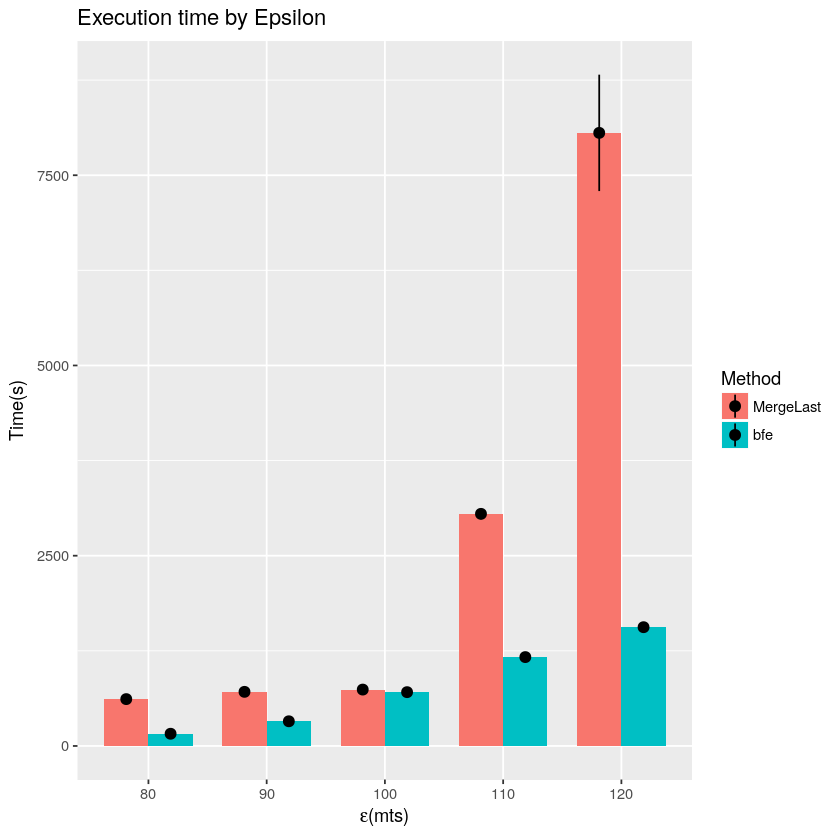

In [7]:
title = "Execution time by Epsilon"
g = ggplot(data=df, aes(x=factor(Epsilon), y=Time.m, fill=Method, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)

In [17]:
st = read.csv(paste0(RESEARCH_HOME, PATH, 'ml_epsilon_stages.csv'), header = F, sep = ";")

names(st)  = c("runID", "n", "Method", "Epsilon", "Mu", "Delta", "Stage", "Time")
st$Epsilon = as.numeric(as.character(st$Epsilon))
st$Mu      = as.numeric(as.character(st$Mu))
st$Delta   = as.numeric(as.character(st$Delta))
st$Time    = as.numeric(as.character(st$Time))
st = st[, c("runID", "Stage", "Epsilon", "Mu", "Delta", "Time")]


In [18]:
st_s = summaryBy(data=st, Time ~ Epsilon + Mu + Delta + Stage, FUN = function(x){ c(m=mean(x),s=sd(x))})
st_s

Epsilon,Mu,Delta,Stage,Time.m,Time.s
80,5,6,0.Reporting locations,4.902292,0.2474830
80,5,6,1.Set of disks for t_i,25.868333,13.2556208
80,5,6,2.Set of disks for t_i+delta,35.782500,4.4257775
80,5,6,3.Joining timestams,15.043750,1.3304946
80,5,6,4.Checking internals,12.860833,1.1861957
80,5,6,Running MergeLast,615.487500,21.9244633
90,5,6,0.Reporting locations,5.081667,0.2940497
90,5,6,1.Set of disks for t_i,32.640000,17.7788966
90,5,6,2.Set of disks for t_i+delta,38.885000,4.7874328
90,5,6,3.Joining timestams,19.831667,1.5519908


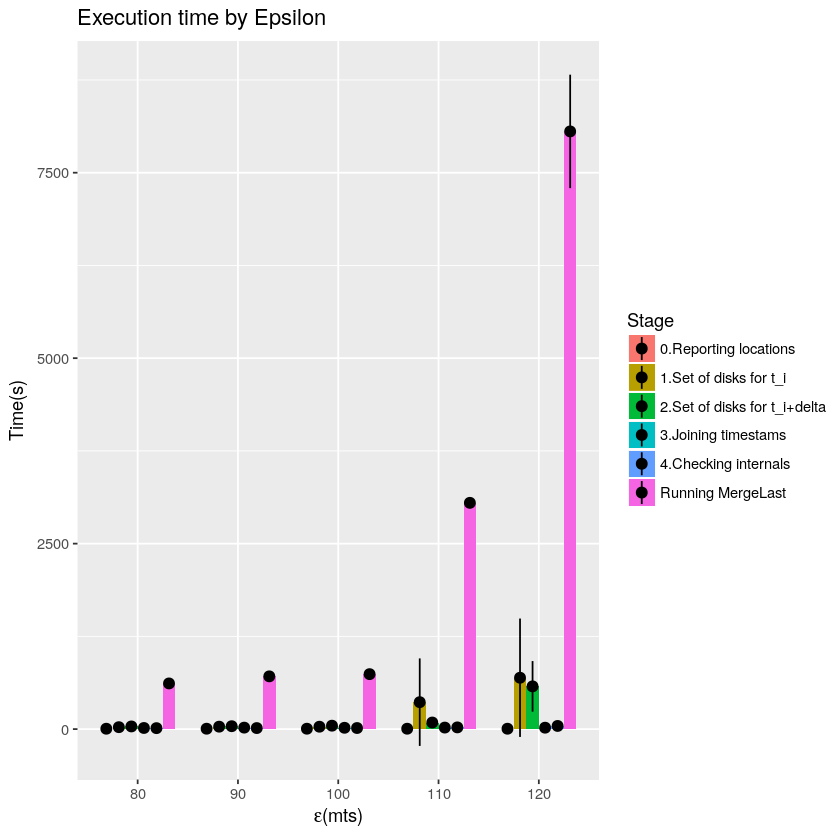

In [19]:
title = "Execution time by Epsilon"
g = ggplot(data=st_s, aes(x=factor(Epsilon), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)

In [32]:
mdf = read.csv(paste0(RESEARCH_HOME, PATH, 'ml_epsilon_mdf.csv'), header = F, sep = ";")

names(mdf)  = c("mdfID", "n", "runID", "Stage", "Epsilon", "Mu", "Delta", "Time", "Load", "Timestamp")
mdf$Epsilon   = as.numeric(as.character(mdf$Epsilon))
mdf$Mu        = as.numeric(as.character(mdf$Mu))
mdf$Delta     = as.numeric(as.character(mdf$Delta))
mdf$Time      = as.numeric(as.character(mdf$Time))
mdf$Load      = as.numeric(as.character(mdf$Load))
mdf$Timestamp = as.numeric(as.character(mdf$Timestamp))

mdf_s = summaryBy(data=mdf, Time ~ Epsilon + Mu + Delta + Stage, FUN = function(x){ c(m=mean(x),s=sd(x))})
mdf_s

Epsilon,Mu,Delta,Stage,Time.m,Time.s
80,5,6,A.Indexing points...,6.7873182,1.46504271
80,5,6,B.Getting pairs...,9.1492727,2.56045201
80,5,6,C.Computing centers...,1.5978409,0.30767538
80,5,6,D.Indexing centers...,1.3171818,0.18091644
80,5,6,E.Getting disks...,7.3790227,1.25706494
80,5,6,F.Filtering less-than-mu disks...,0.4828182,0.13861495
80,5,6,G.Prunning duplicate candidates...,2.6672727,0.50211235
80,5,6,H.Indexing candidates...,3.0774773,0.51443586
80,5,6,I.Getting expansions...,0.3085455,0.08698341
80,5,6,J.Finding maximal disks...,0.9656591,1.05478026


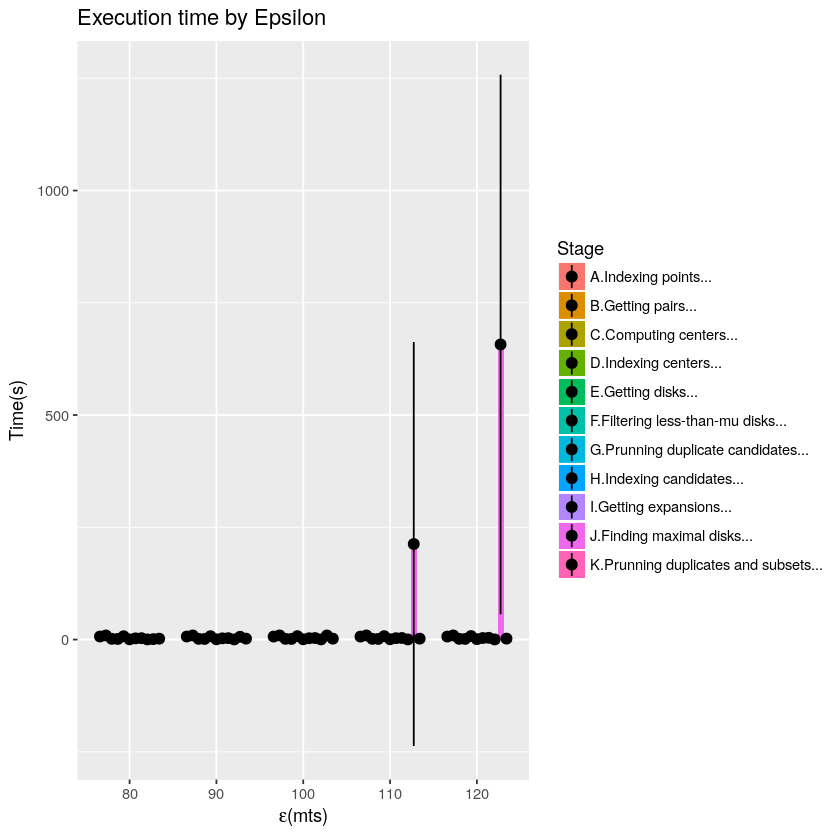

In [33]:
title = "Execution time by Epsilon"
g = ggplot(data=mdf_s, aes(x=factor(Epsilon), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)

In [47]:
mdf_110 = mdf[mdf$Epsilon == 110 & (mdf$Stage == "H.Indexing candidates..." | mdf$Stage == "J.Finding maximal disks..."), ]
mdf_110

data = sqldf("SELECT mdfID, Timestamp, MAX(Time) AS Time, MAX(Load) AS Load FROM mdf_110 GROUP BY mdfID, Timestamp")


,mdfID,n,runID,Stage,Epsilon,Mu,Delta,Time,Load,Timestamp
371,33,799,3,H.Indexing candidates...,110,5,6,3.869,17049,0
373,33,801,3,J.Finding maximal disks...,110,5,6,46.072,2553,0
382,34,816,3,H.Indexing candidates...,110,5,6,3.957,17870,5
384,34,818,3,J.Finding maximal disks...,110,5,6,105.520,2747,5
393,35,839,3,H.Indexing candidates...,110,5,6,2.942,17416,1
395,35,841,3,J.Finding maximal disks...,110,5,6,50.596,2586,1
404,36,856,3,H.Indexing candidates...,110,5,6,3.429,17770,6
406,36,858,3,J.Finding maximal disks...,110,5,6,38.013,2733,6
415,37,879,3,H.Indexing candidates...,110,5,6,2.248,17604,2
417,37,881,3,J.Finding maximal disks...,110,5,6,109.573,2660,2


Timestamp,Time.m,Time.s
0,49.39500,3.488480
1,49.47825,1.213846
2,108.26675,3.621249
3,215.03250,78.056142
4,1603.09025,128.694040
5,54.87525,33.799174
6,48.66650,17.649951
7,94.56650,51.953153
8,29.21525,1.444358
9,49.99725,8.684625


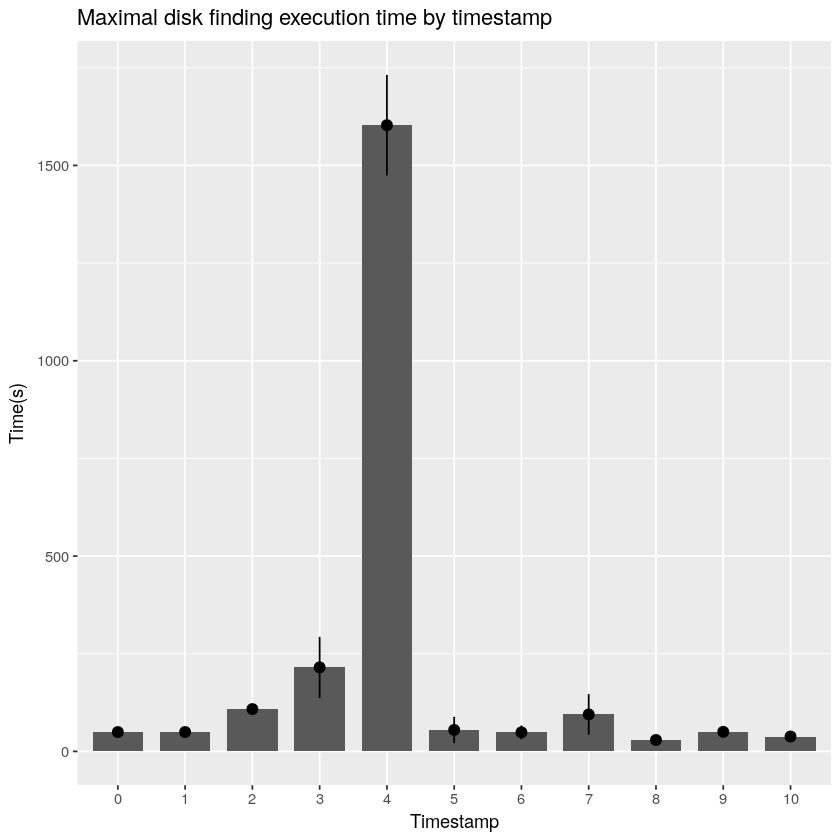

In [49]:
data$Perf = data$Load / data$Time
times   = data[,c("Timestamp", "Time")]
times_s = summaryBy(data=times, Time ~ Timestamp, FUN = function(x){ c(m=mean(x),s=sd(x))})
times_s

title = "Maximal disk finding execution time by timestamp"
g = ggplot(data=times_s, aes(x=factor(Timestamp), y=Time.m, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x="Timestamp") 
plot(g)

Timestamp,Perf.m,Perf.s
0,346.39948,23.495572
1,352.15371,8.732748
2,162.73742,5.543496
3,96.76286,49.253072
4,11.22558,0.835375
5,395.67850,152.074223
6,394.56316,108.962842
7,242.19145,133.000507
8,606.11685,30.349833
9,359.90411,62.122639


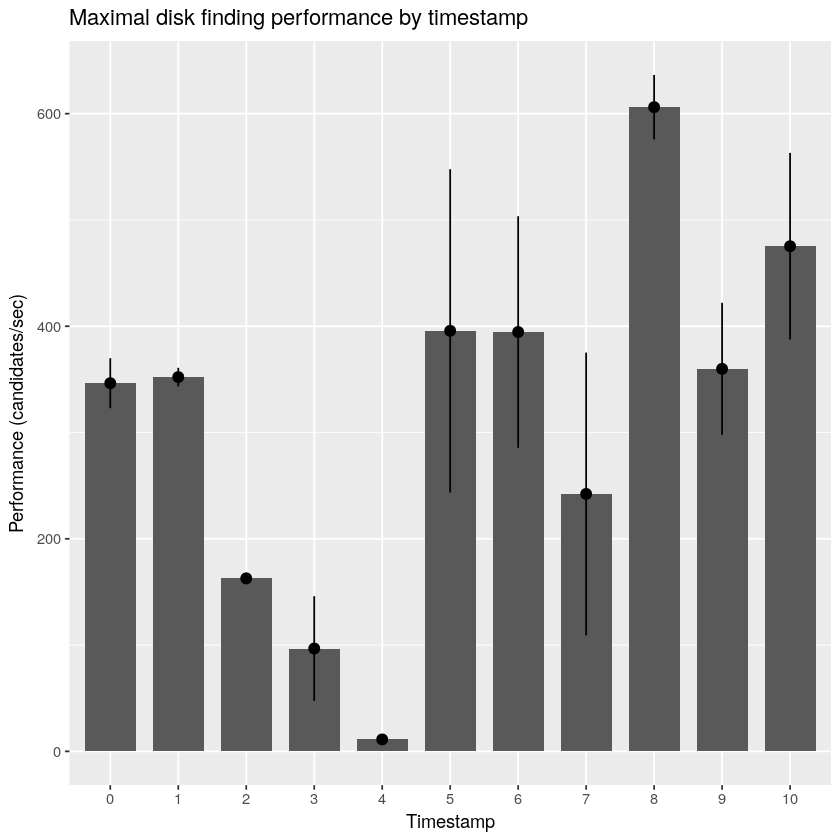

In [55]:
perfs   = data[,c("Timestamp", "Perf")]
perfs_s = summaryBy(data=perfs, Perf ~ Timestamp, FUN = function(x){ c(m=mean(x),s=sd(x))})
perfs_s

title = "Maximal disk finding performance by timestamp"
g = ggplot(data=perfs_s, aes(x=factor(Timestamp), y=Perf.m, ymin = Perf.m-Perf.s, ymax = Perf.m+Perf.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Performance (candidates/sec)", x="Timestamp") 
plot(g)

In [56]:
mdf_120 = mdf[mdf$Epsilon == 120 & (mdf$Stage == "H.Indexing candidates..." | mdf$Stage == "J.Finding maximal disks..."), ]
mdf_120

data = sqldf("SELECT mdfID, Timestamp, MAX(Time) AS Time, MAX(Load) AS Load FROM mdf_120 GROUP BY mdfID, Timestamp")


,mdfID,n,runID,Stage,Epsilon,Mu,Delta,Time,Load,Timestamp
492,44,1056,4,H.Indexing candidates...,120,5,6,4.634,21531,0
494,44,1058,4,J.Finding maximal disks...,120,5,6,169.202,3162,0
503,45,1073,4,H.Indexing candidates...,120,5,6,4.330,22577,5
505,45,1075,4,J.Finding maximal disks...,120,5,6,1035.161,3370,5
514,46,1096,4,H.Indexing candidates...,120,5,6,3.416,21936,1
516,46,1098,4,J.Finding maximal disks...,120,5,6,170.107,3223,1
525,47,1113,4,H.Indexing candidates...,120,5,6,3.837,22457,6
527,47,1115,4,J.Finding maximal disks...,120,5,6,213.278,3348,6
536,48,1136,4,H.Indexing candidates...,120,5,6,3.204,22218,2
538,48,1138,4,J.Finding maximal disks...,120,5,6,675.556,3270,2


Timestamp,Time.m,Time.s
0,173.0390,16.733748
1,176.6367,8.587276
2,638.5943,32.020854
3,2282.9690,12.387402
4,723.2147,16.720798
5,1044.1287,26.246798
6,353.1603,238.301218
7,505.1367,246.682108
8,314.8073,5.054175
9,243.0750,5.844504


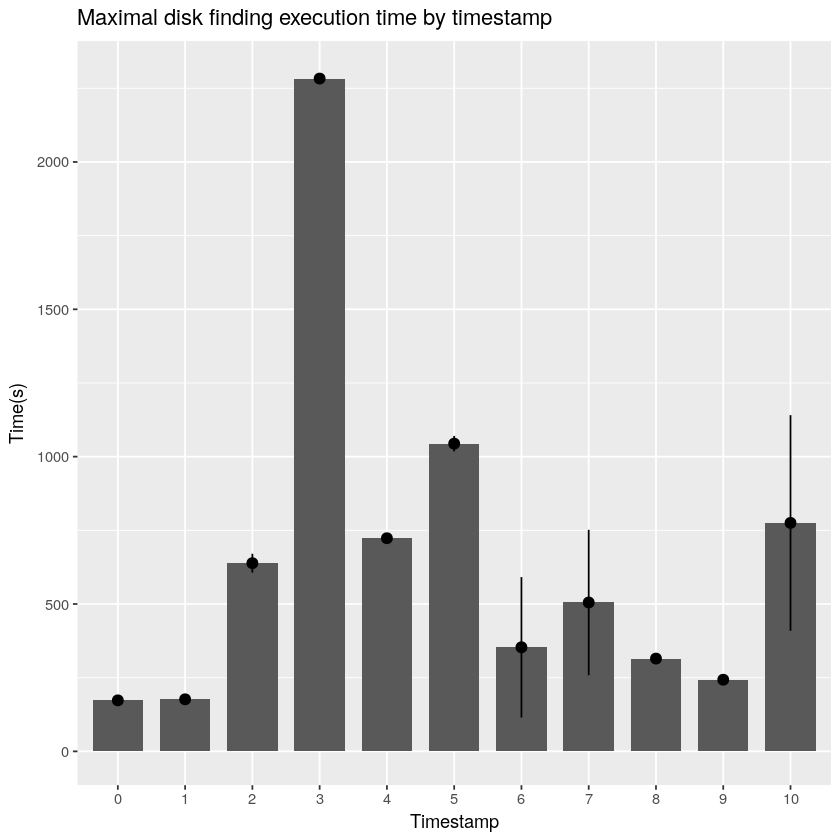

In [57]:
data$Perf = data$Load / data$Time
times   = data[,c("Timestamp", "Time")]
times_s = summaryBy(data=times, Time ~ Timestamp, FUN = function(x){ c(m=mean(x),s=sd(x))})
times_s

title = "Maximal disk finding execution time by timestamp"
g = ggplot(data=times_s, aes(x=factor(Timestamp), y=Time.m, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x="Timestamp") 
plot(g)

Timestamp,Perf.m,Perf.s
0,125.186853,11.7746806
1,124.378670,5.9107018
2,34.848816,1.6984128
3,9.926742,0.0537056
4,31.333720,0.7182271
5,21.631825,0.5377183
6,81.367474,39.5287979
7,57.082923,38.7898214
8,71.163646,1.1389880
9,92.101382,2.1927790


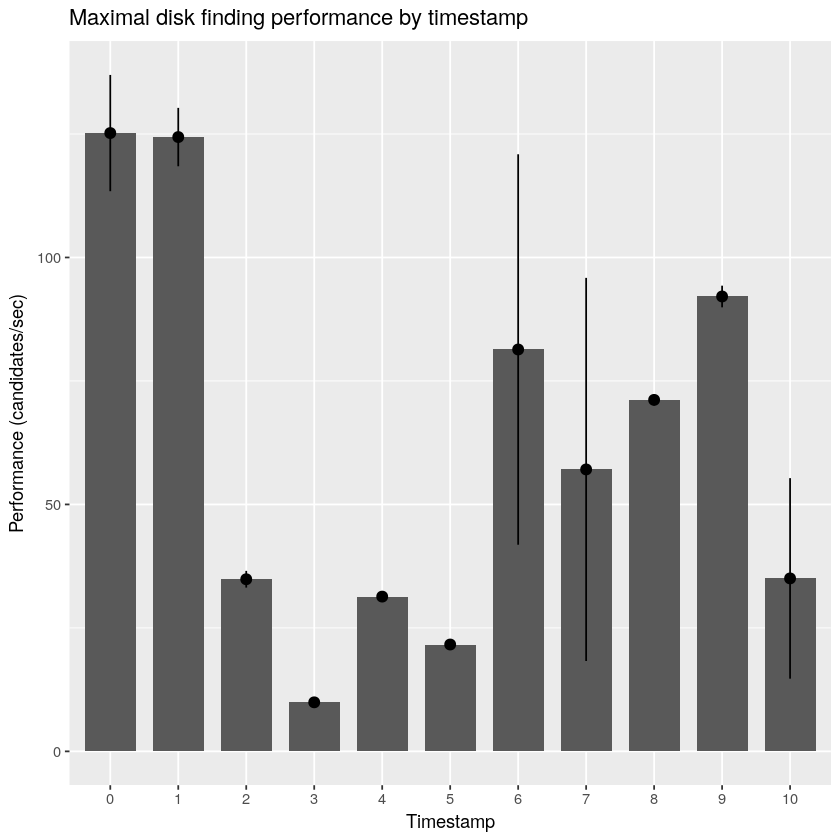

In [58]:
perfs   = data[,c("Timestamp", "Perf")]
perfs_s = summaryBy(data=perfs, Perf ~ Timestamp, FUN = function(x){ c(m=mean(x),s=sd(x))})
perfs_s

title = "Maximal disk finding performance by timestamp"
g = ggplot(data=perfs_s, aes(x=factor(Timestamp), y=Perf.m, ymin = Perf.m-Perf.s, ymax = Perf.m+Perf.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Performance (candidates/sec)", x="Timestamp") 
plot(g)